In [1]:
import numpy as np
import pandas as pd

In [2]:
spam=pd.read_csv('/content/drive/MyDrive/Machine Learning/Email Classify System/spam.csv',on_bad_lines='skip',encoding='latin-1')

In [3]:
spam.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
spam.shape

(5572, 5)

In [5]:
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
spam.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
spam.rename(columns={'v1':'mtype','v2':'message'},inplace=True)

In [8]:
spam.head()

,mtype,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [10]:
spam['mtype']=encoder.fit_transform(spam['mtype'])

In [11]:
spam.head()

,mtype,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
spam.isnull().sum()

mtype      0
message    0
dtype: int64

In [13]:
spam.duplicated().sum()

403

In [14]:
spam=spam.drop_duplicates(keep='first')

In [15]:
spam.duplicated().sum()

0

In [16]:
spam.shape

(5169, 2)

In [17]:
spam['mtype'].value_counts()

0    4516
1     653
Name: mtype, dtype: int64

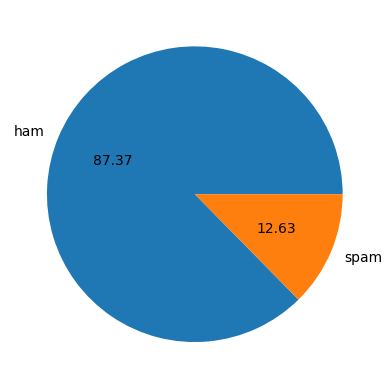

In [18]:
import matplotlib.pyplot as plt
plt.pie(spam['mtype'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [19]:
import nltk

In [20]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [21]:
spam['num_characters']=spam['message'].apply(len)

In [22]:
spam['num_words']=spam['message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [23]:
spam.head()

,mtype,message,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [24]:
spam['num_sentences']=spam['message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [25]:
spam.tail()

,mtype,message,num_characters,num_words,num_sentences
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1
5571,0,Rofl. Its true to its name,26,7,2


In [26]:
spam[['num_words','num_sentences','num_characters']].describe()

,num_words,num_sentences,num_characters
count,5169.000000,5169.000000,5169.000000
mean,18.455794,1.965564,78.977945
std,13.324758,1.448541,58.236293
min,1.000000,1.000000,2.000000
25%,9.000000,1.000000,36.000000
50%,15.000000,1.000000,60.000000
75%,26.000000,2.000000,117.000000
max,220.000000,38.000000,910.000000


In [27]:
spam.rename(columns={'number_char':'num_characters','num_word':'num_words'},inplace=True)
spam.head()

,mtype,message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [28]:
# ham messages
spam[spam['mtype']==0][['num_words','num_sentences','num_characters']].describe()

,num_words,num_sentences,num_characters
count,4516.000000,4516.000000,4516.000000
mean,17.123782,1.820195,70.459256
std,13.493970,1.383657,56.358207
min,1.000000,1.000000,2.000000
25%,8.000000,1.000000,34.000000
50%,13.000000,1.000000,52.000000
75%,22.000000,2.000000,90.000000
max,220.000000,38.000000,910.000000


In [29]:
# spam messages
spam[spam['mtype']==1][['num_words','num_sentences','num_characters']].describe()

,num_words,num_sentences,num_characters
count,653.000000,653.000000,653.000000
mean,27.667688,2.970904,137.891271
std,7.008418,1.488425,30.137753
min,2.000000,1.000000,13.000000
25%,25.000000,2.000000,132.000000
50%,29.000000,3.000000,149.000000
75%,32.000000,4.000000,157.000000
max,46.000000,9.000000,224.000000


In [30]:
spam[spam['mtype']==0]

,mtype,message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
6,0,Even my brother is not like to speak with me. ...,77,18,2
...,...,...,...,...,...
5565,0,Huh y lei...,12,4,1
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


<Axes: xlabel='num_characters', ylabel='Count'>

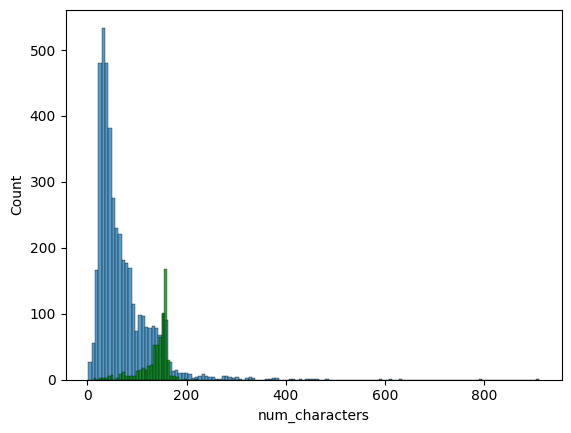

In [31]:
import seaborn as sns
sns.histplot(spam[spam['mtype']==0]['num_characters'])
sns.histplot(spam[spam['mtype']==1]['num_characters'],color='green')

<Axes: xlabel='num_characters', ylabel='Count'>

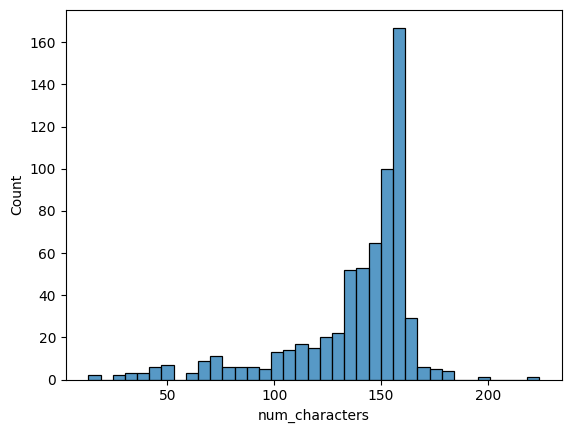

In [32]:
sns.histplot(spam[spam['mtype']==1]['num_characters'])

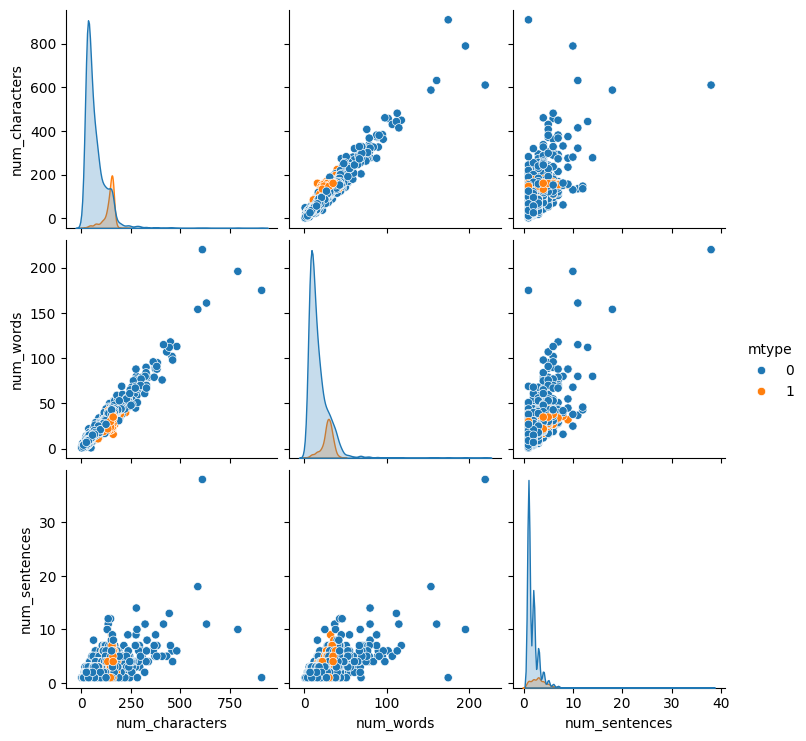

In [33]:
sns.pairplot(spam,hue='mtype')

<ipython-input-34-89ec33f0141c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(spam.corr(),annot=True)


<Axes: >

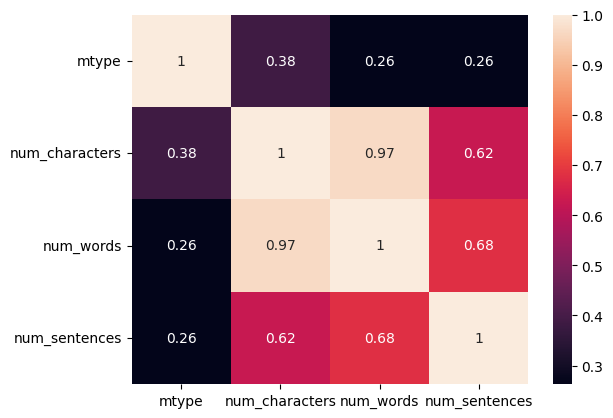

In [34]:
sns.heatmap(spam.corr(),annot=True)

In [35]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [36]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('loving')

'love'

In [37]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [38]:
def transform_message(message):
  message=message.lower()
  message=nltk.word_tokenize(message)
  lis=[]
  for i in message:
    if i.isalnum():
      lis.append(i)

  message=lis[:]
  lis.clear()

  for i in message:
    if i not in stopwords.words('english') and i not in string.punctuation:
      lis.append(i)

  message=lis[:]
  lis.clear()

  for i in message:
    lis.append(ps.stem(i))

  return " ".join(lis)

In [39]:
l=transform_message("Hii, How are you Rashmi?How about Learning machine learning?")
print(l)

hii rashmi learn machin learn


In [40]:
spam['message'].apply(transform_message)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: message, Length: 5169, dtype: object

In [41]:
spam['transformed_text']=spam['message'].apply(transform_message)

In [42]:
spam.head()

,mtype,message,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [43]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [44]:
spam_cloud=wc.generate(spam[spam['mtype']==1]['transformed_text'].str.cat(sep=" "))

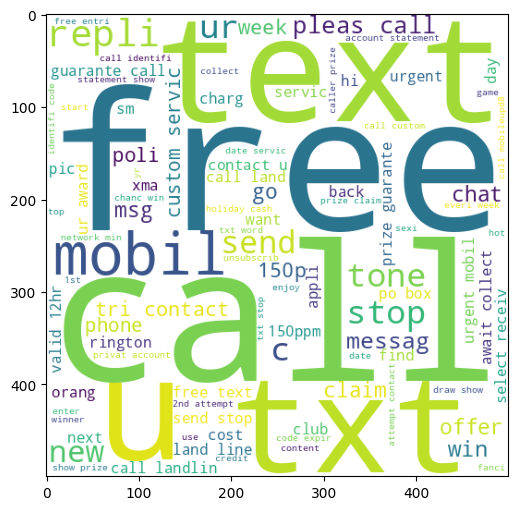

In [45]:
plt.figure(figsize=(18,6))
plt.imshow(spam_cloud)

In [46]:
ham_cloud=wc.generate(spam[spam['mtype']==0]['transformed_text'].str.cat(sep=" "))

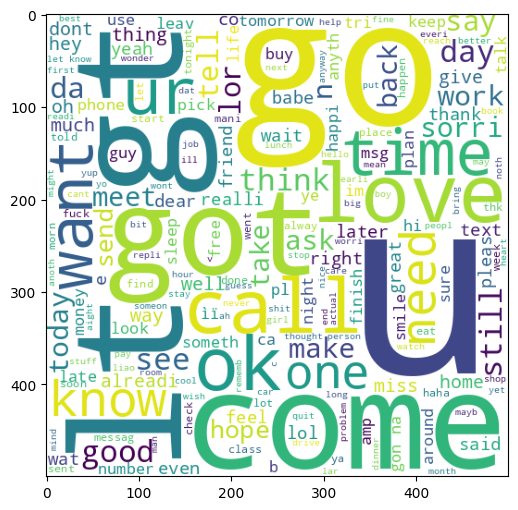

In [47]:
plt.figure(figsize=(15,6))
plt.imshow(ham_cloud)

In [48]:
spam_words=[]
for msg in spam[spam['mtype']==1]['transformed_text'].tolist():
  for word in msg.split():
    spam_words.append(word)
len(spam_words)

9939

In [49]:
from collections import Counter
pd.DataFrame(Counter(spam_words).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


In [50]:
wrds=pd.DataFrame(Counter(spam_words).most_common(30),columns=['Word','Count'])
print(wrds)

       Word  Count
0      call    320
1      free    191
2         2    155
3       txt    141
4      text    122
5         u    119
6        ur    119
7     mobil    114
8      stop    104
9     repli    103
10    claim     98
11        4     97
12    prize     82
13      get     74
14      new     64
15   servic     64
16     tone     63
17     send     60
18   urgent     57
19    nokia     57
20  contact     56
21    award     55
22    phone     52
23     cash     51
24    pleas     51
25     week     49
26      win     48
27        c     45
28  collect     45
29      min     45


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, 'call'),
  Text(1, 0, 'free'),
  Text(2, 0, '2'),
  Text(3, 0, 'txt'),
  Text(4, 0, 'text'),
  Text(5, 0, 'u'),
  Text(6, 0, 'ur'),
  Text(7, 0, 'mobil'),
  Text(8, 0, 'stop'),
  Text(9, 0, 'repli'),
  Text(10, 0, 'claim'),
  Text(11, 0, '4'),
  Text(12, 0, 'prize'),
  Text(13, 0, 'get'),
  Text(14, 0, 'new'),
  Text(15, 0, 'servic'),
  Text(16, 0, 'tone'),
  Text(17, 0, 'send'),
  Text(18, 0, 'urgent'),
  Text(19, 0, 'nokia'),
  Text(20, 0, 'contact'),
  Text(21, 0, 'award'),
  Text(22, 0, 'phone'),
  Text(23, 0, 'cash'),
  Text(24, 0, 'pleas'),
  Text(25, 0, 'week'),
  Text(26, 0, 'win'),
  Text(27, 0, 'c'),
  Text(28, 0, 'collect'),
  Text(29, 0, 'min')])

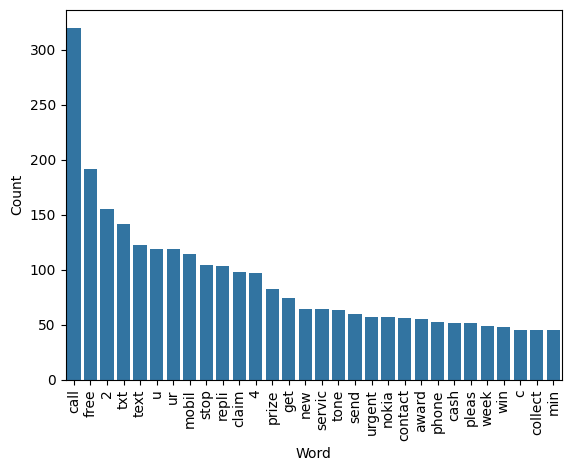

In [51]:
sns.barplot(x='Word',y='Count',data=wrds)
plt.xticks(rotation='vertical')

In [52]:
ham_words=[]
for msg in spam[spam['mtype']==0]['transformed_text'].tolist():
  for word in msg.split():
    ham_words.append(word)
len(ham_words)

35404

In [53]:
wrds=pd.DataFrame(Counter(ham_words).most_common(30),columns=['Word','Count'])
print(wrds)

     Word  Count
0       u    883
1      go    404
2     get    349
3      gt    288
4      lt    287
5       2    284
6    come    275
7     got    236
8    know    236
9    like    234
10   call    233
11   time    219
12     ok    217
13   love    216
14   good    213
15   want    208
16     ur    197
17    day    190
18   need    170
19    one    165
20    lor    159
21      4    156
22   home    152
23  think    149
24    see    147
25   take    143
26  still    143
27     da    142
28   tell    133
29   make    129


Model Building

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()

In [55]:
#features
X=tf.fit_transform(spam['transformed_text']).toarray()

In [56]:
X.shape

(5169, 6708)

In [57]:
#labels
y=spam['mtype'].values

In [58]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
#this split the dataset into training and testing set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [61]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score

In [62]:
gn=GaussianNB() #It assumes that features follow normal distribution
bn=BernoulliNB() #for binary  values
mn=MultinomialNB() #for discrete data such as classification based on word count then it supposed to be used

In [63]:
gn.fit(X_train,y_train)
y_prediction=gn.predict(X_test)
print(accuracy_score(y_test,y_prediction))
print(confusion_matrix(y_test,y_prediction))
print(precision_score(y_test,y_prediction))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [64]:
bn.fit(X_train,y_train)
y_prediction=bn.predict(X_test)
print(accuracy_score(y_test,y_prediction))
print(confusion_matrix(y_test,y_prediction))
print(precision_score(y_test,y_prediction))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [65]:
mn.fit(X_train,y_train)
y_prediction=mn.predict(X_test)
print(accuracy_score(y_test,y_prediction))
print(confusion_matrix(y_test,y_prediction))
print(precision_score(y_test,y_prediction))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [66]:
spam[spam['mtype']==1]['message'].head(10)

2     Free entry in 2 a wkly comp to win FA Cup fina...
5     FreeMsg Hey there darling it's been 3 week's n...
8     WINNER!! As a valued network customer you have...
9     Had your mobile 11 months or more? U R entitle...
11    SIX chances to win CASH! From 100 to 20,000 po...
12    URGENT! You have won a 1 week FREE membership ...
15    XXXMobileMovieClub: To use your credit, click ...
19    England v Macedonia - dont miss the goals/team...
34    Thanks for your subscription to Ringtone UK yo...
42    07732584351 - Rodger Burns - MSG = We tried to...
Name: message, dtype: object

In [68]:
message=input("Enter message:")
transformed_msg=transform_message(message)
vectorized_message=tf.transform([transformed_msg])
result=mn.predict(vectorized_message)[0]
if result==0:
  print("No spam message")
else:
  print("Spam message")

Enter message:8     WINNER!! As a valued network customer you have...
Spam message
